<a href="https://colab.research.google.com/github/AngelSusanVino/Data-Analysis/blob/main/IIIT_Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Default of Credit Card Clients**

**Internship - IIIT Kottayam**

**Angel Susan Vino**



## **Dataset Information**
[link text](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np

**Loading dataset**

In [ ]:
df = pd.read_csv("default of credit card clients.csv")

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**Checking out the dataset**

In [ ]:
df.shape

(30000, 25)

No. of Rows 30000
No. of Coloumns 25

In [ ]:
df.head(5)#first 5

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.dtypes # for datatypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Here all the variables are described to be in integer format

*   Target : default payment next month
*   Categorigal: Sex Education Marriage
*   Numerical: All others except the above three.



In [ ]:
df.describe() # statistical measures

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The summary provides various statistical metrics for each of the columns:

count: The number of non-null values in each column.

mean: The mean or average value of each column.

std: The standard deviation, which measures the dispersion of values from the mean.

min: The minimum value in each column.

25%: The 25th percentile, also known as the first quartile or lower quartile.

50%: The 50th percentile, also known as the median or second quartile.

75%: The 75th percentile, also known as the third quartile or upper quartile.

max: The maximum value in each column.


Total Record :30000

Std Dev value for Limit_Bal , Bill_Amt, Pay_Amt


In [ ]:
df[['SEX']].value_counts()

SEX
2      18112
1      11888
dtype: int64

In [ ]:
df[['EDUCATION']].value_counts()

EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64

In [ ]:
df[['MARRIAGE']].value_counts()

MARRIAGE
2           15964
1           13659
3             323
0              54
dtype: int64

Here we observe undefined values(missing values) for education and marriage and we can see 0 so we should look in detail if we want them or not.

In [ ]:
df[df['EDUCATION']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3769,3770,290000,2,0,2,38,1,-1,-1,-1,...,1406,2196,1481,1437,3078,1406,2196,1481,0,0
5945,5946,270000,1,0,2,39,1,-1,-1,-1,...,18607,0,0,10193,70213,19008,399,0,0,0
6876,6877,360000,1,0,2,30,0,0,-1,0,...,34345,36777,30,23000,12280,25007,25008,1767,3300,0
14631,14632,350000,2,0,2,53,-1,-1,-1,-1,...,22611,1385,6043,4840,61349,22687,1389,6058,1153,0
15107,15108,210000,1,0,2,45,-2,-2,-2,-2,...,788,3499,3372,5854,1032,788,3565,3372,15381,0
16881,16882,100000,1,0,2,37,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
16896,16897,200000,1,0,2,40,1,-2,-1,-1,...,1000,0,0,0,200,1000,0,0,0,0
17414,17415,230000,2,0,2,47,-1,-1,-1,2,...,255,5425,4838,5743,1598,0,5425,4838,3840,0
19920,19921,50000,2,0,1,40,0,0,0,0,...,47647,40500,41921,2229,2298,2100,2500,1921,8432,0
20030,20031,200000,2,0,2,30,-1,-1,2,-1,...,9470,5816,7809,2880,0,9470,5834,7809,2886,0


In [ ]:
df[df['MARRIAGE']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
218,219,110000,2,3,0,31,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,810,160000,2,2,0,37,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,821,200000,2,3,0,51,-1,-1,-1,-1,...,780,390,390,0,390,780,0,390,390,0
1019,1020,180000,2,3,0,45,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,1444,200000,1,3,0,51,-1,-1,-1,-1,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
2146,2147,150000,2,3,0,55,-1,-1,-1,-1,...,2939,3396,1870,17498,9160,2939,3396,1870,6800,0
2554,2555,220000,2,1,0,33,-1,-1,-1,-1,...,608,1738,277,1531,942,608,1738,277,492,0
3056,3057,200000,1,3,0,36,-2,-2,-2,-2,...,41359,9140,0,89187,14178,41359,9140,0,0,0
4470,4471,70000,1,3,0,35,2,2,2,2,...,50517,51658,52758,2200,1900,2000,2100,2100,2000,0
5005,5006,90000,2,3,0,24,-2,-2,-2,-1,...,13574,6800,1830,20108,4000,13574,14,5,13162,0


In [ ]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
#cardinality
for column_name in df.columns:
  cardinality = df[column_name].nunique()
  # Print the cardinality
  print(column_name ,":", cardinality)

ID : 30000
LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default payment next month : 2


In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated(subset=None, keep='first')
# Print the rows with duplicate values
print(df[duplicate_rows])

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]


In [ ]:
#To check the balance of our target variable
print(len(df[df['default payment next month']==1]))
print(len(df[df['default payment next month']==0]))

6636
23364


**Exploratory Data Analysis**

In [ ]:
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#we split the columns based on what they can be grouped to
about_client = list(df.columns[1:6])
pay = list(df.columns[6:12])
bill_amt = list(df.columns[12:18])
pay_amt = list(df.columns[18:24])

In [ ]:
#Histogram

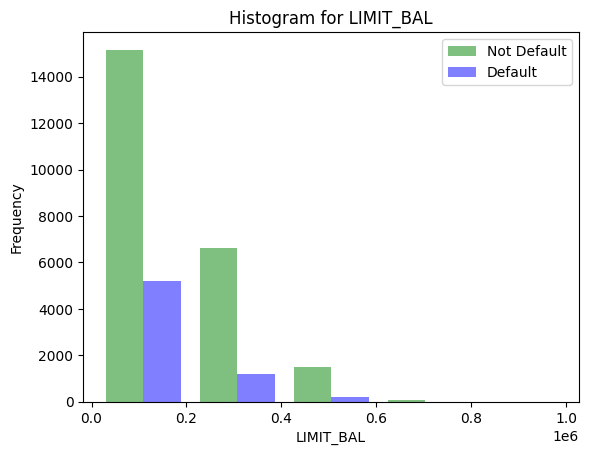

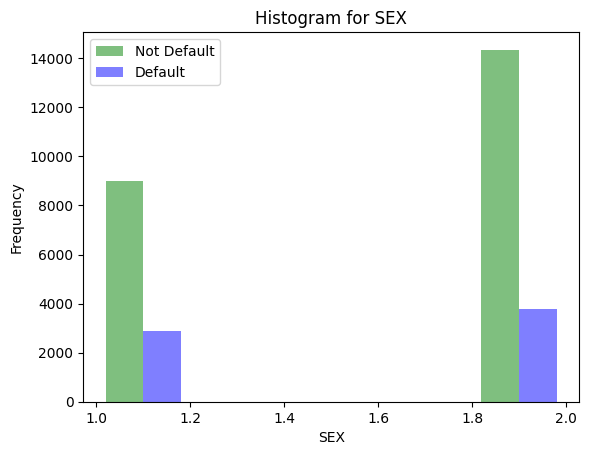

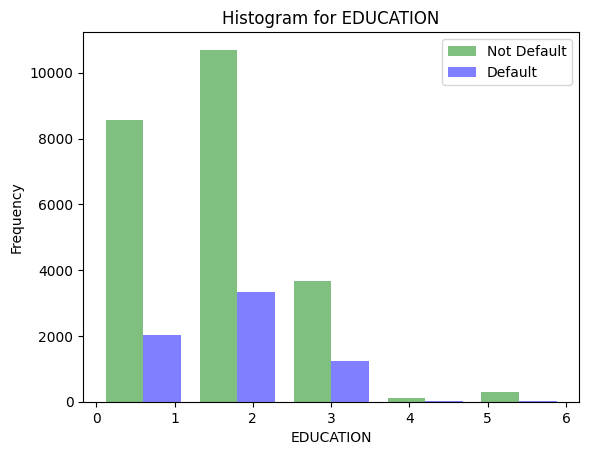

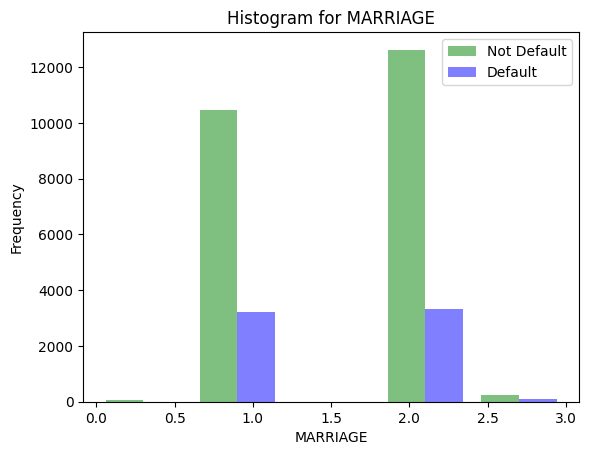

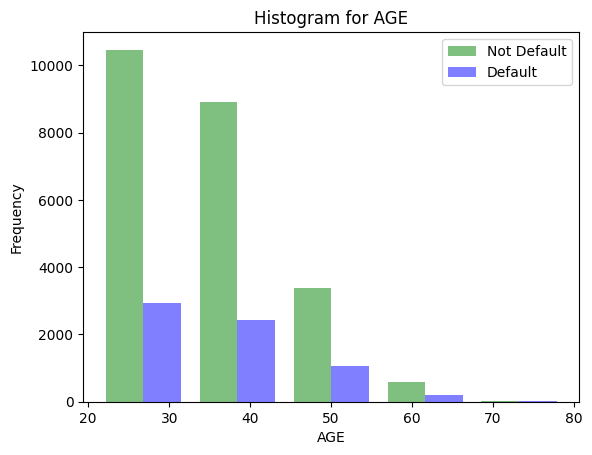

In [ ]:
for columns in about_client:
    plt.figure()  # Create a new figure for each histogram
    plt.hist([df[df['default payment next month'] == 0][columns], df[df['default payment next month'] == 1][columns]],
             bins=5, alpha=0.5, label=['Not Default', 'Default'],color=['green','blue'])
    plt.title(f"Histogram for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

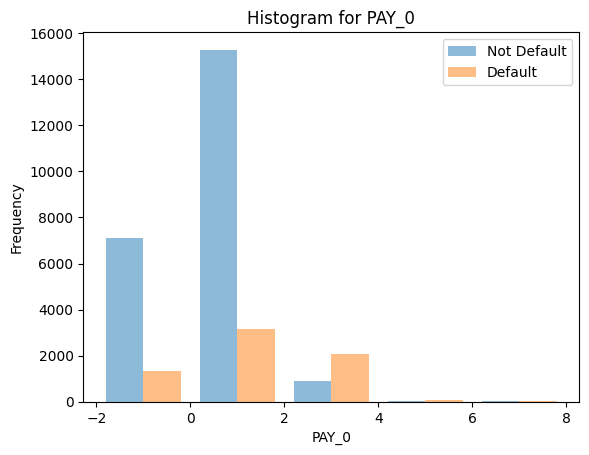

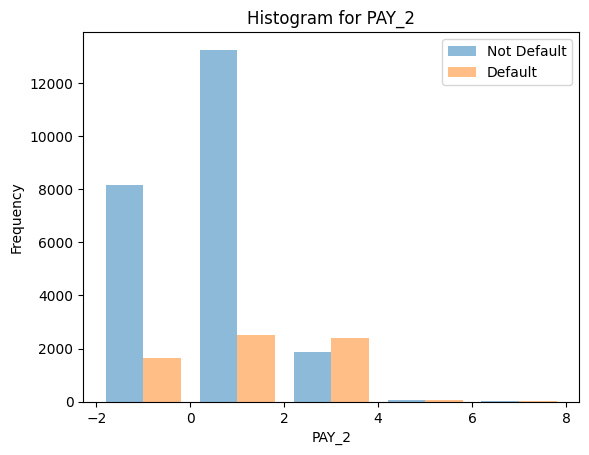

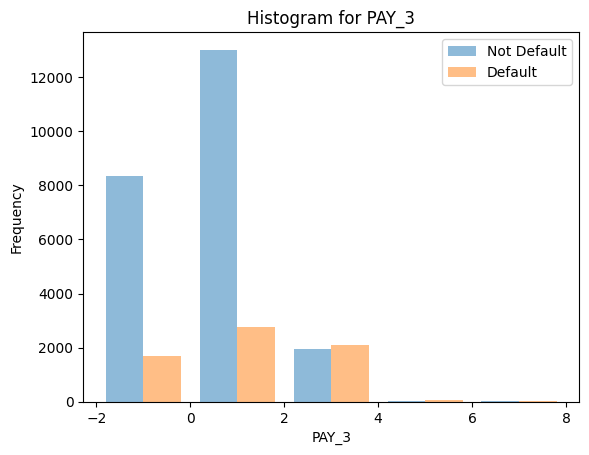

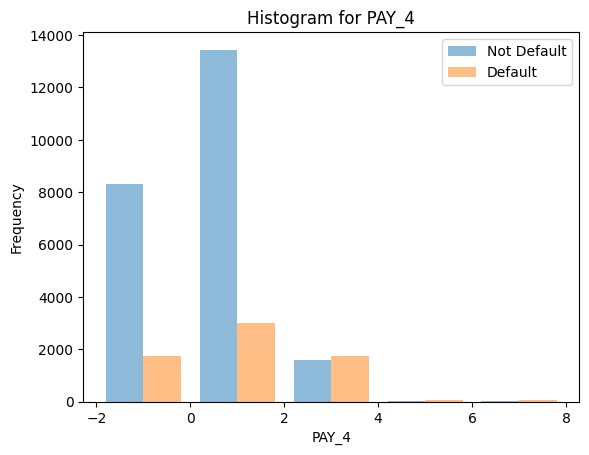

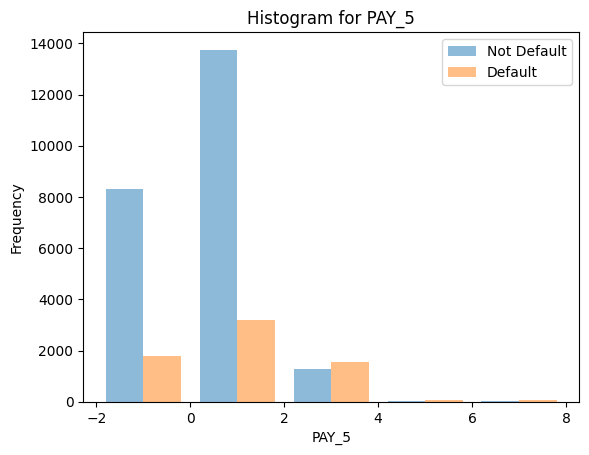

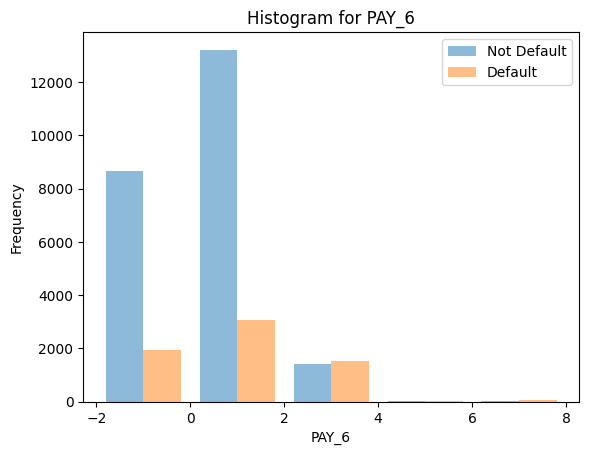

In [ ]:
for columns in pay:
    plt.figure()  # Create a new figure for each histogram
    plt.hist([df[df['default payment next month'] == 0][columns], df[df['default payment next month'] == 1][columns]],
             bins=5, alpha=0.5, label=['Not Default', 'Default'])
    plt.title(f"Histogram for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

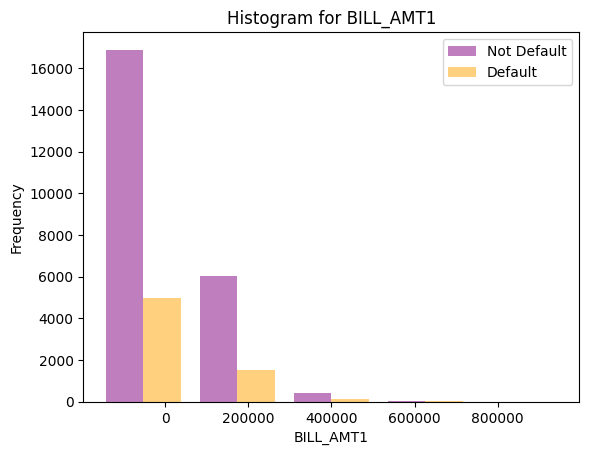

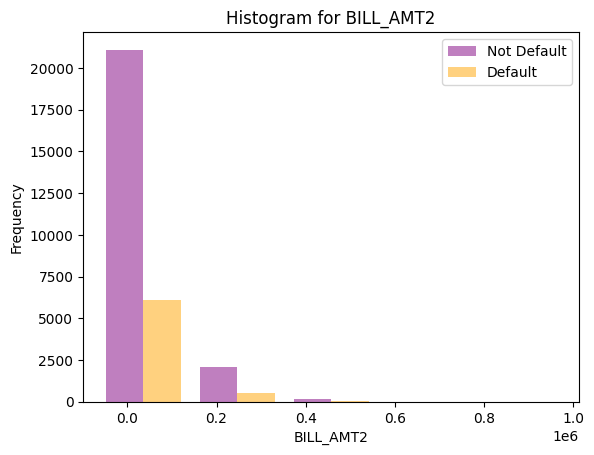

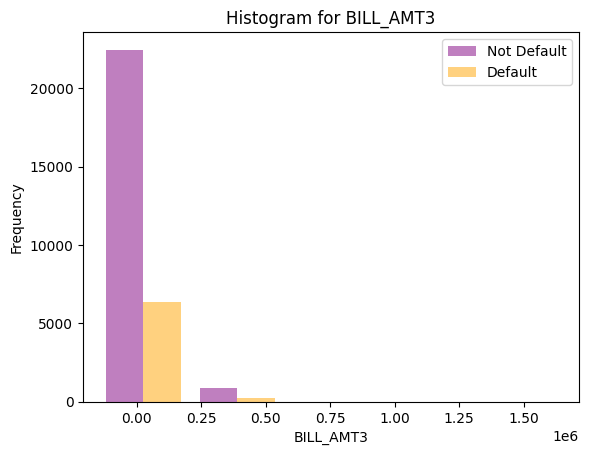

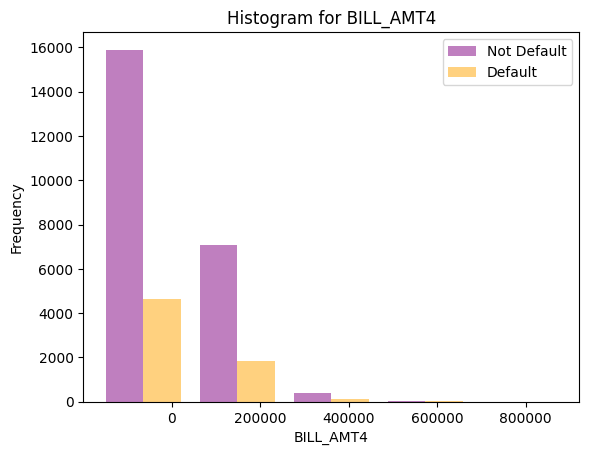

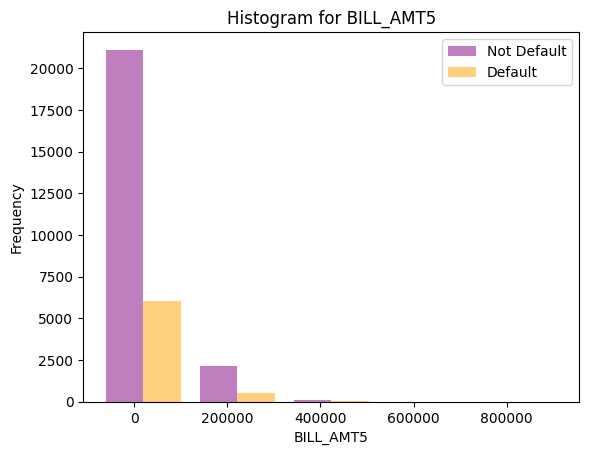

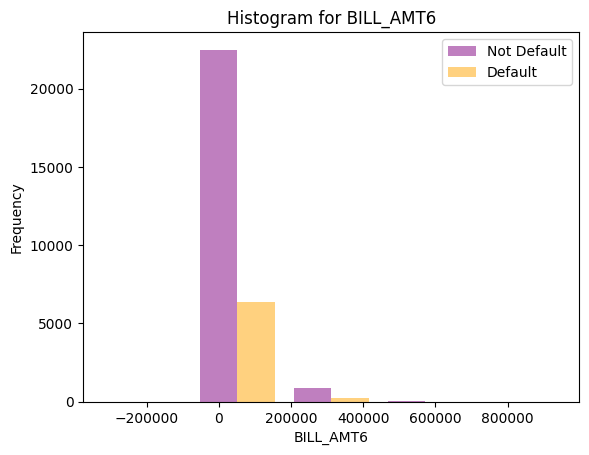

In [ ]:
for columns in bill_amt:
    plt.figure()  # Create a new figure for each histogram
    plt.hist([df[df['default payment next month'] == 0][columns], df[df['default payment next month'] == 1][columns]],
             bins=5, alpha=0.5, label=['Not Default', 'Default'],color=['purple','orange'])
    plt.title(f"Histogram for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

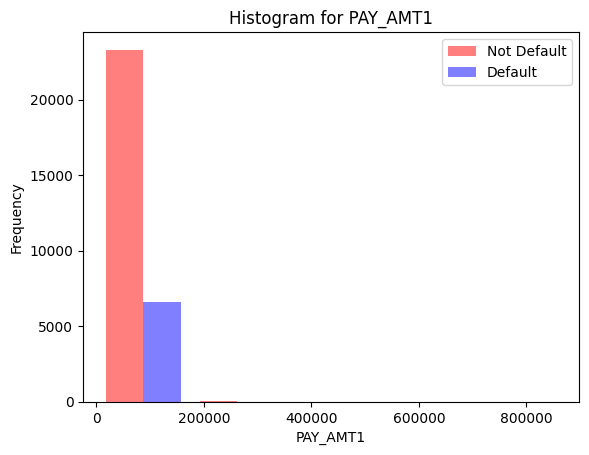

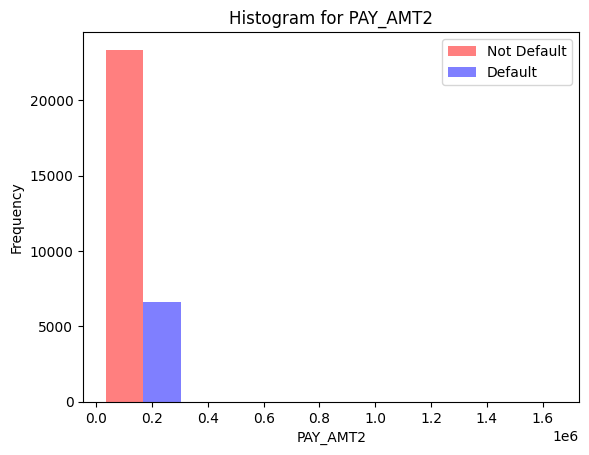

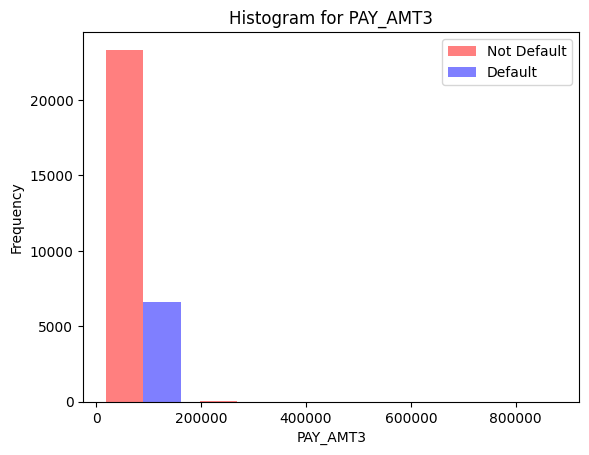

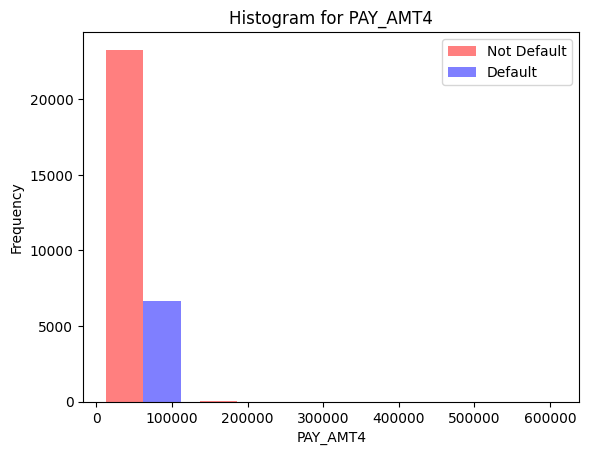

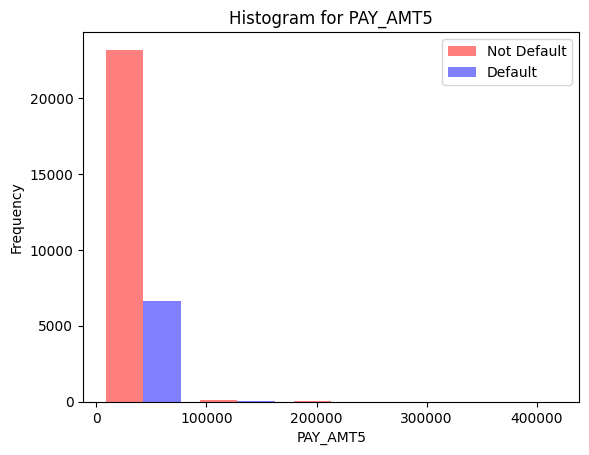

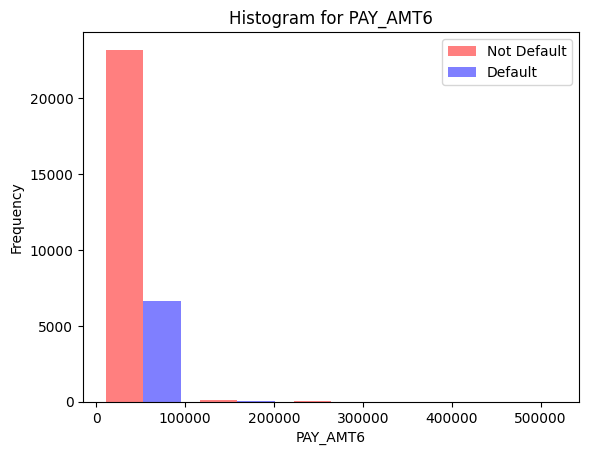

In [ ]:
for columns in pay_amt:
    plt.figure()  # Create a new figure for each histogram
    plt.hist([df[df['default payment next month'] == 0][columns], df[df['default payment next month'] == 1][columns]],
             bins=5, alpha=0.5, label=['Not Default', 'Default'] , color =['red','blue'])
    plt.title(f"Histogram for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [ ]:
#Correlation Map

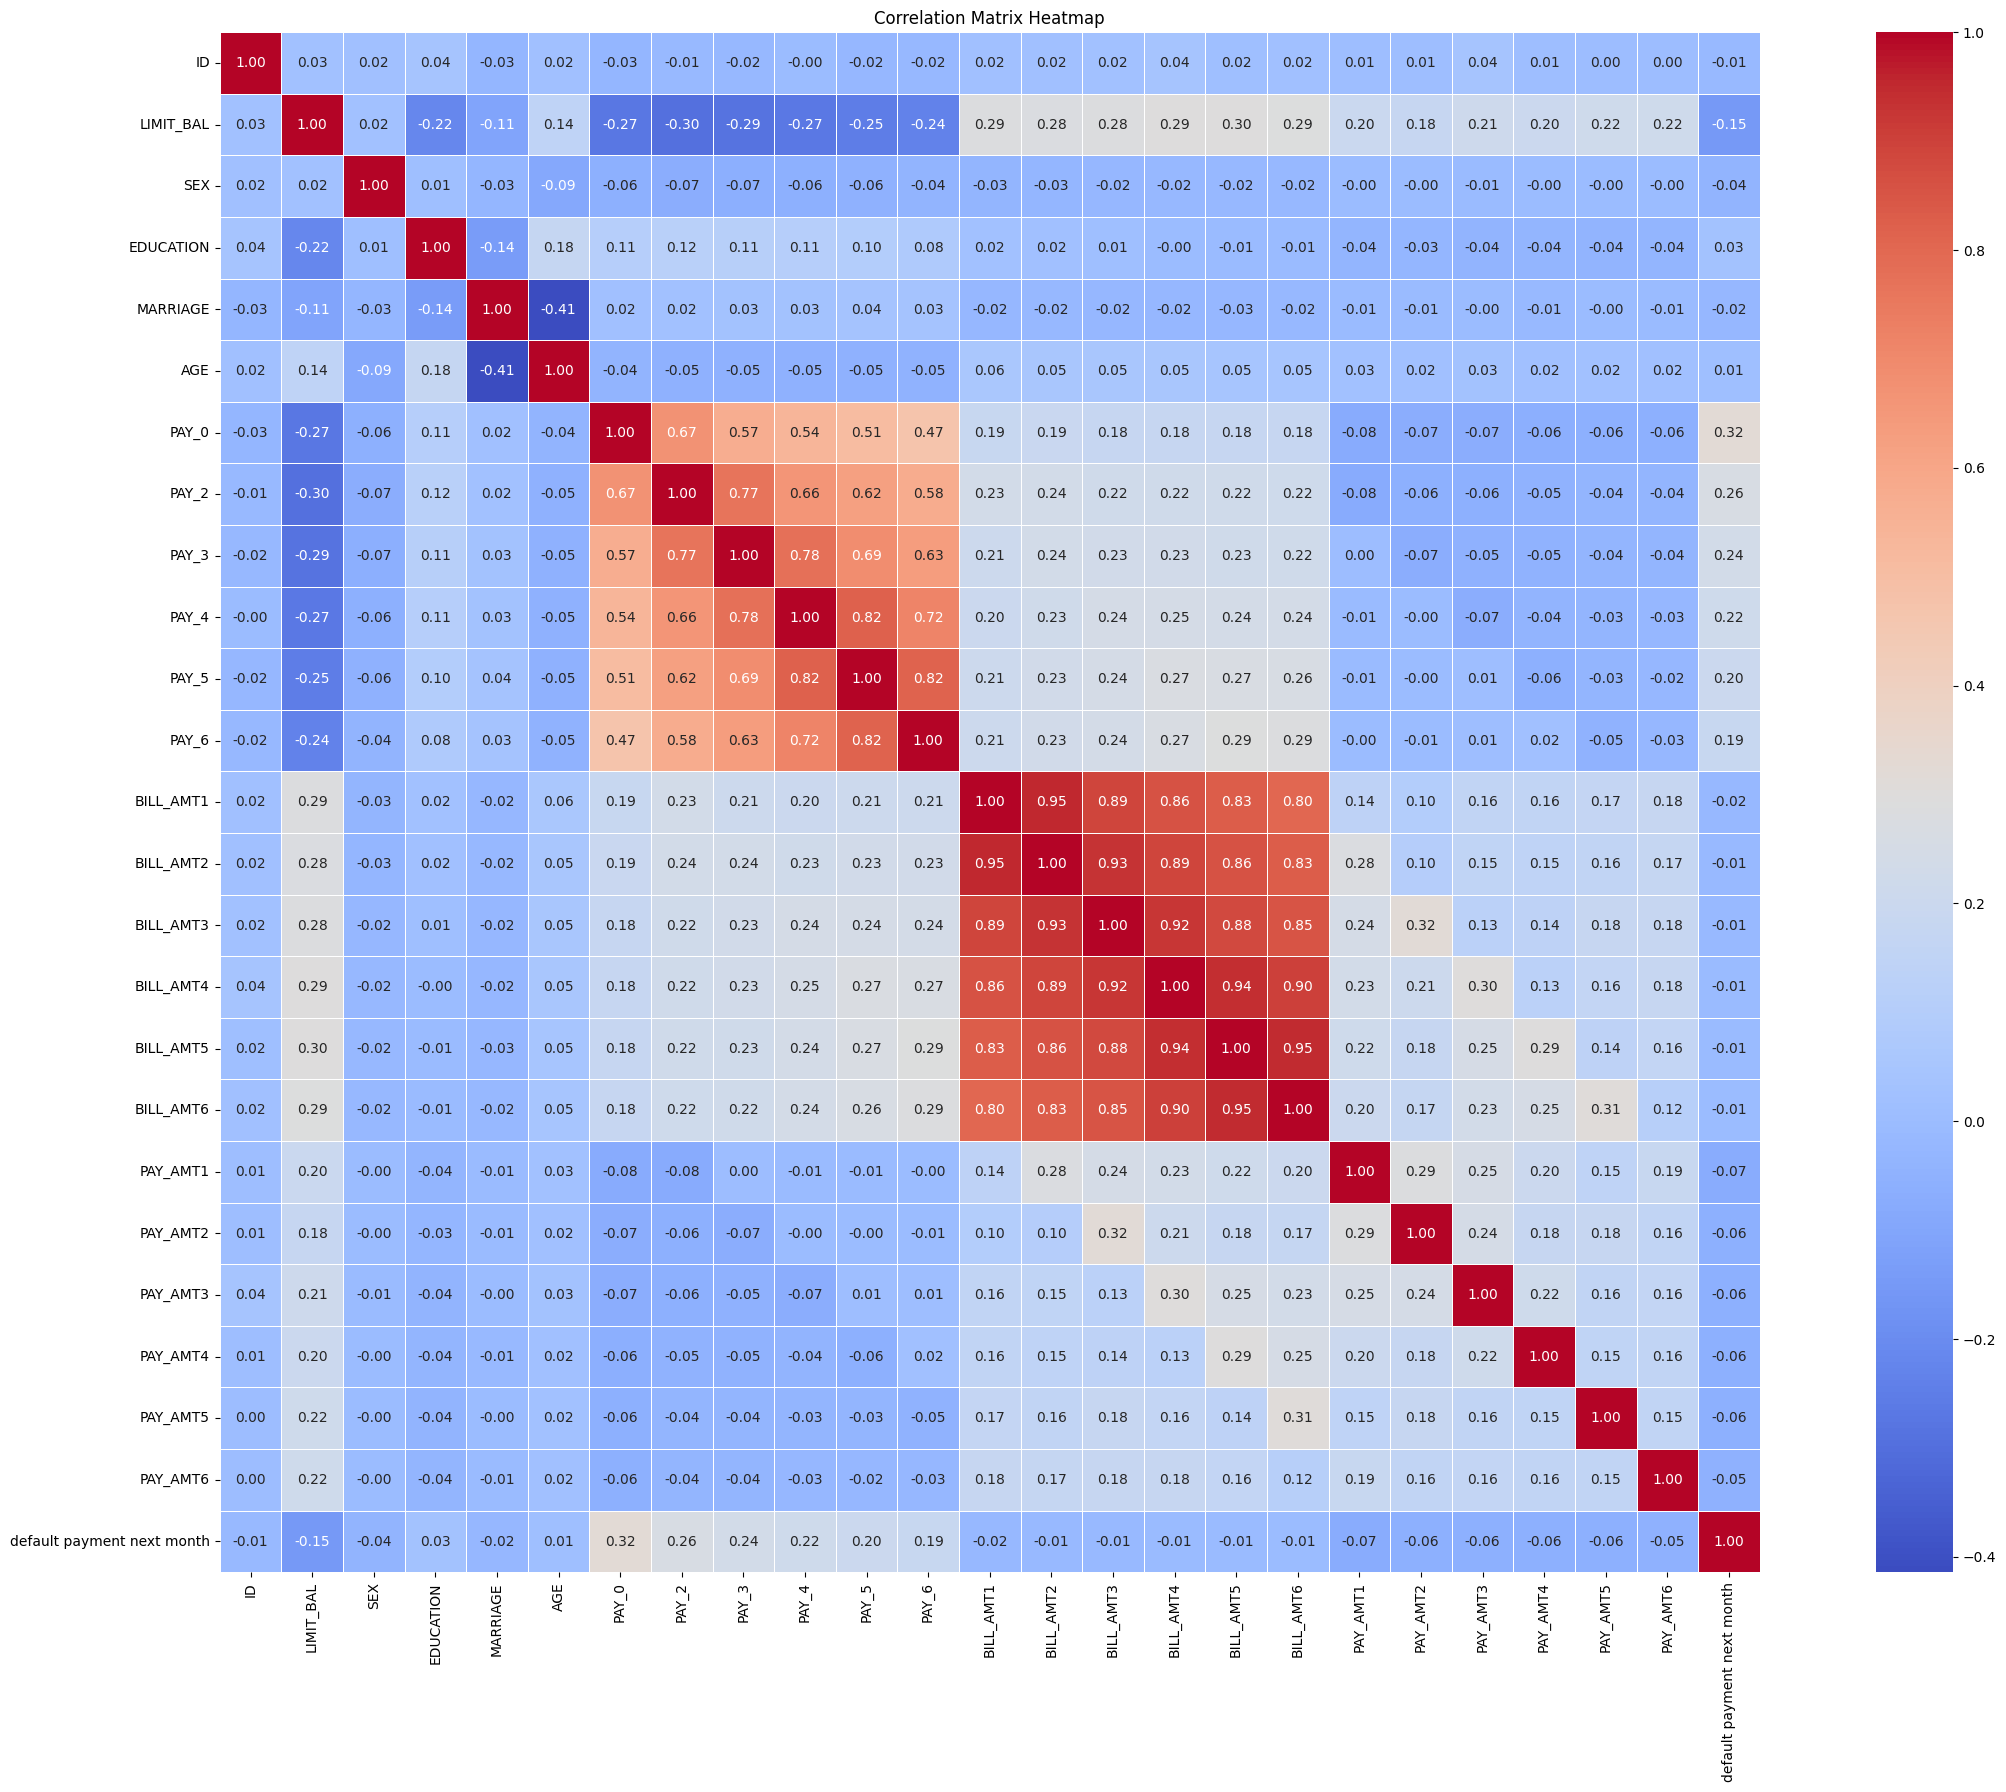

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(30, 20))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Extract the upper triangle of the correlation matrix to avoid duplicates and 1s along the diagonal
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Get the best positive correlations by sorting in descending order
best_positive_correlations = upper_triangle.unstack().sort_values(ascending=False)

# Filter only positive correlations (correlation > 0)
best_positive_correlations = best_positive_correlations[best_positive_correlations > 0]
sorted_pairs= best_positive_correlations
top_pairs = sorted_pairs[:30]

# Print the list of best positive correlations
print(top_pairs)

BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT5  BILL_AMT4    0.940134
BILL_AMT3  BILL_AMT2    0.928326
BILL_AMT4  BILL_AMT3    0.923969
BILL_AMT6  BILL_AMT4    0.900941
BILL_AMT4  BILL_AMT2    0.892482
BILL_AMT3  BILL_AMT1    0.892279
BILL_AMT5  BILL_AMT3    0.883910
BILL_AMT4  BILL_AMT1    0.860272
BILL_AMT5  BILL_AMT2    0.859778
BILL_AMT6  BILL_AMT3    0.853320
           BILL_AMT2    0.831594
BILL_AMT5  BILL_AMT1    0.829779
PAY_5      PAY_4        0.819835
PAY_6      PAY_5        0.816900
BILL_AMT6  BILL_AMT1    0.802650
PAY_4      PAY_3        0.777359
PAY_3      PAY_2        0.766552
PAY_6      PAY_4        0.716449
PAY_5      PAY_3        0.686775
PAY_2      PAY_0        0.672164
PAY_4      PAY_2        0.662067
PAY_6      PAY_3        0.632684
PAY_5      PAY_2        0.622780
PAY_6      PAY_2        0.575501
PAY_3      PAY_0        0.574245
PAY_4      PAY_0        0.538841
PAY_5      PAY_0        0.509426
PAY_6      PAY_0        0.474553
dtype: flo

In [ ]:
# Checking correlations for the above two main variables with target variable
pay.append('default payment next month')
bill_amt.append('default payment next month')

In [ ]:
pay

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default payment next month']

In [ ]:
bill_amt

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'default payment next month']

In [ ]:
pay_subset = df[pay]
bill_amt_subset =df[bill_amt]

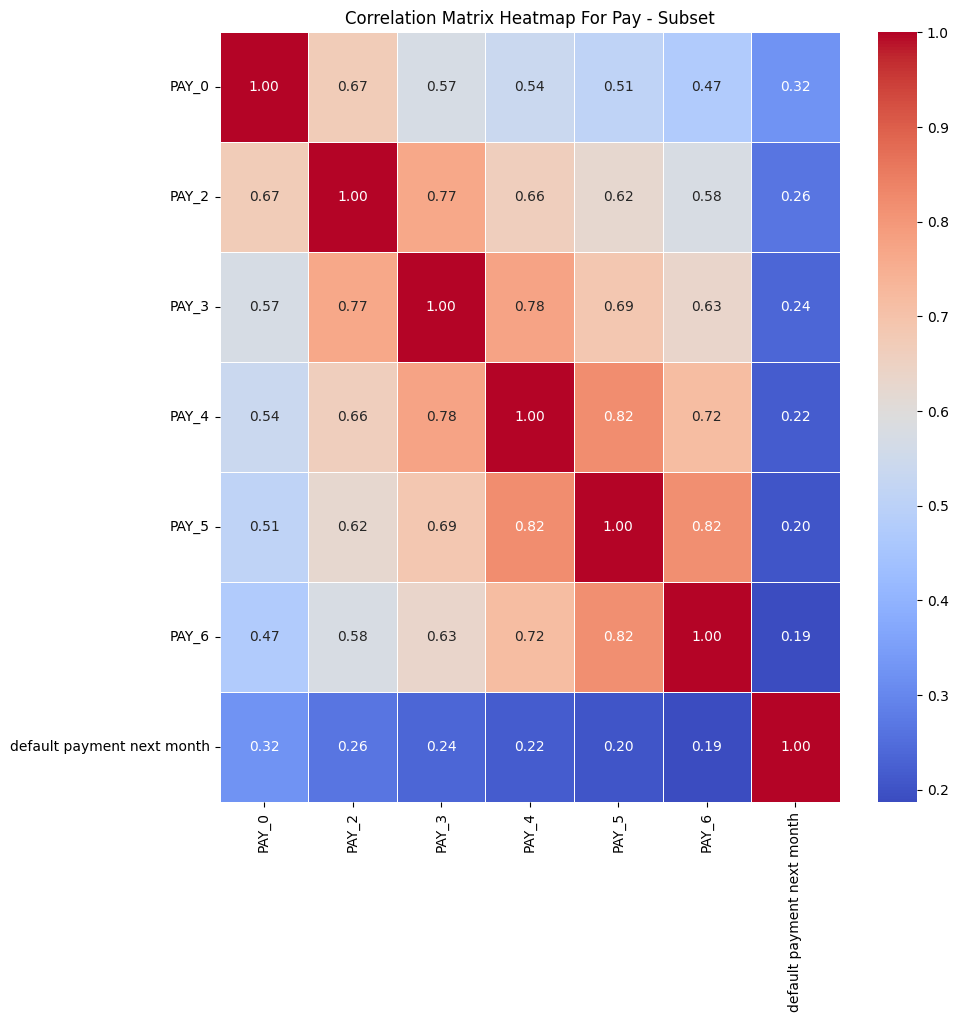

In [ ]:
# Calculate the correlation matrix
correlation_matrix_pay = pay_subset.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_pay, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap For Pay - Subset')
plt.show()

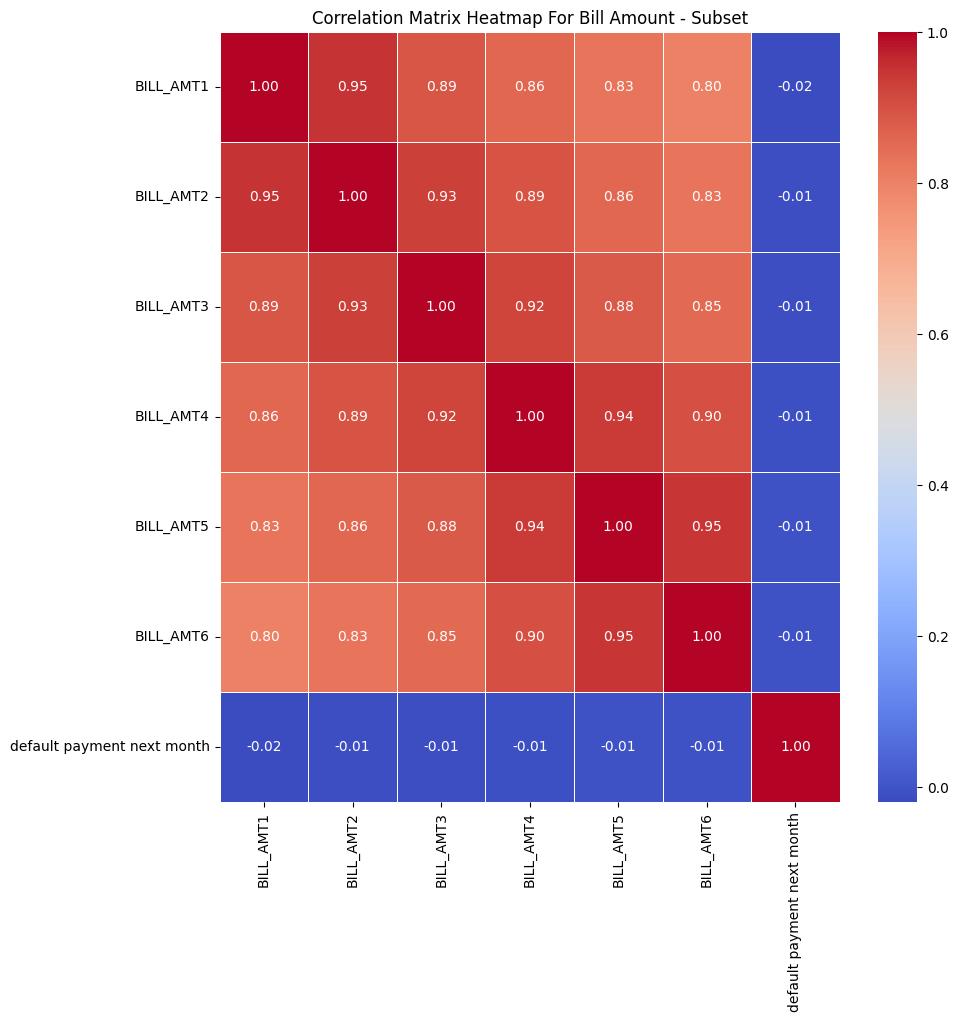

In [ ]:
# Calculate the correlation matrix
correlation_matrix_bill = bill_amt_subset.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_bill, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap For Bill Amount - Subset')
plt.show()

**Preprocessing**

In [ ]:
df.rename(columns={"PAY_0": " PAY_1"}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', ' PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.drop(['ID'], axis=1, inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', ' PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

*  ***Feature Engineering***

In [ ]:
# dropping high corrleated features
df = df.drop(['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',], axis =1)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', ' PAY_1',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [ ]:
#regroupping the undefined ones in EDUCATION and MARRIAGE
df['EDUCATION'] = np.where(df['EDUCATION'].isin([5, 6, 0]), 4, df['EDUCATION'])

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

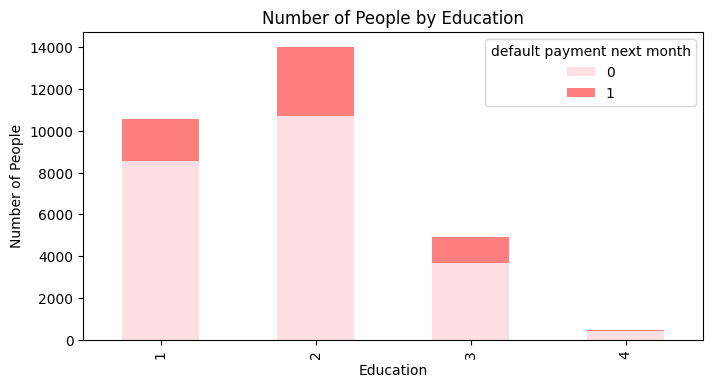

In [ ]:
grouped_data = df.groupby(['EDUCATION', 'default payment next month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 4),color =('pink','red'),alpha=0.5)
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.title('Number of People by Education')
plt.show()

In [ ]:
# Marriage: group 0 under category 3
df['MARRIAGE'] = np.where(df['MARRIAGE'].isin([0]), 3, df['MARRIAGE'])
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

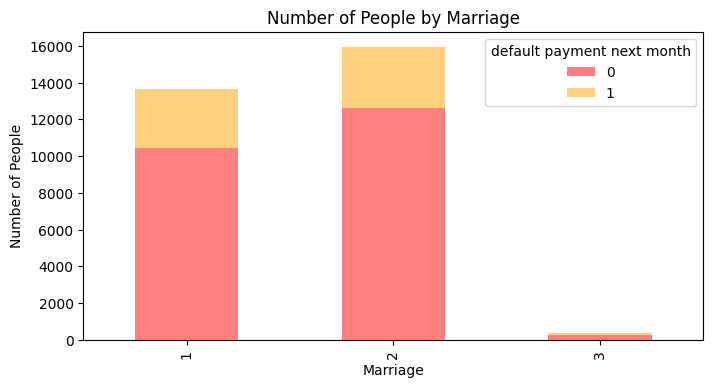

In [ ]:
grouped_data = df.groupby(['MARRIAGE', 'default payment next month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 4),color=('red','orange'),alpha=0.5)
plt.xlabel('Marriage')
plt.ylabel('Number of People')
plt.title('Number of People by Marriage')
plt.show()

In [ ]:
#Now we create a new feature Age_Range
age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '60+']
df['age_range'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_range
0,20000,2,2,1,24,2,3913,0,689,0,0,0,0,1,18-29
1,120000,2,2,2,26,-1,2682,0,1000,1000,1000,0,2000,1,18-29
2,90000,2,2,2,34,0,29239,1518,1500,1000,1000,1000,5000,0,30-39
3,50000,2,2,1,37,0,46990,2000,2019,1200,1100,1069,1000,0,30-39
4,50000,1,2,1,57,-1,8617,2000,36681,10000,9000,689,679,0,50-59


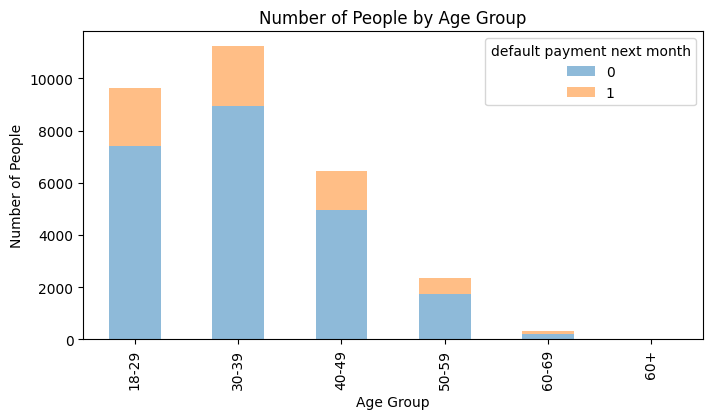

In [ ]:
grouped_data = df.groupby(['age_range', 'default payment next month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 4),alpha=0.5)
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Number of People by Age Group')
plt.show()

*   ***One-hot Encoding***
     
    One-hot encoding is a popular technique used in machine learning and data analysis to convert categorical data into a numerical representation. It is commonly used when dealing with categorical variables, where each observation can belong to one and only one category.

    In one-hot encoding, each unique category is represented as a binary vector, where all elements are zero except for the element corresponding to the category, which is set to one. This way, categorical data is transformed into a numerical format that can be readily used by machine learning algorithms.



In [ ]:
# one-hot encoding for EDUCATION, MARRIAGE and Age_range
df_onehot = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','age_range'])

In [ ]:
df_onehot.head()

,LIMIT_BAL,SEX,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_60+
0,20000,2,24,2,3913,0,689,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,120000,2,26,-1,2682,0,1000,1000,1000,0,...,0,0,1,0,1,0,0,0,0,0
2,90000,2,34,0,29239,1518,1500,1000,1000,1000,...,0,0,1,0,0,1,0,0,0,0
3,50000,2,37,0,46990,2000,2019,1200,1100,1069,...,0,1,0,0,0,1,0,0,0,0
4,50000,1,57,-1,8617,2000,36681,10000,9000,689,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Encode Sex as 0 for women and 1 for men
df_onehot['SEX'] = np.where(df_onehot['SEX']==2, 0, df_onehot['SEX'])
df_onehot['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df_onehot.head()

,LIMIT_BAL,SEX,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_60+
0,20000,0,24,2,3913,0,689,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,120000,0,26,-1,2682,0,1000,1000,1000,0,...,0,0,1,0,1,0,0,0,0,0
2,90000,0,34,0,29239,1518,1500,1000,1000,1000,...,0,0,1,0,0,1,0,0,0,0
3,50000,0,37,0,46990,2000,2019,1200,1100,1069,...,0,1,0,0,0,1,0,0,0,0
4,50000,1,57,-1,8617,2000,36681,10000,9000,689,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_onehot = df_onehot.drop(['AGE','SEX'],axis=1)

In [ ]:
df_onehot.columns

Index(['LIMIT_BAL', ' PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'age_range_18-29',
       'age_range_30-39', 'age_range_40-49', 'age_range_50-59',
       'age_range_60-69', 'age_range_60+'],
      dtype='object')

**Spilitting the Dataframe**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y= df_onehot['default payment next month']
x= df_onehot.drop(['default payment next month'],axis =1)

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
x_train.shape , x_test.shape

((24000, 22), (6000, 22))

In [ ]:
y_train.shape , y_test.shape

((24000,), (6000,))

In [ ]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

18691
5309


*   ***Over Sampling***

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

*   StandardScaler from sklearn.preprocessing: This class is used for standardizing features by removing the mean and scaling to unit variance. Standardization is essential when features have different scales, as it helps algorithms that rely on distance-based calculations to perform more effectively. It's common to use StandardScaler on the feature matrix before feeding it to a machine learning model.

*   RandomOverSampler from imblearn.over_sampling: This class is part of the imbalanced-learn library, which provides various techniques for dealing with imbalanced datasets. The RandomOverSampler is used to oversample the minority class by generating synthetic samples through random duplication. It helps balance the class distribution, making it useful when dealing with imbalanced classification problems.

*   resample from sklearn.utils: This function is used for resampling data, specifically for balancing class distributions. It can be used for both oversampling and undersampling. The resample function randomly selects samples from the majority class to match the number of samples in the minority class for oversampling. For undersampling, it randomly removes samples from the majority class to match the number of samples in the minority class.

In [ ]:
# scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Oversample the data
ros = RandomOverSampler(sampling_strategy='minority')
x_train, y_train = ros.fit_resample(x_train, y_train)

In [ ]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

18691
18691


**ML Models**

*    ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
model_1 = LogisticRegression()
model_1 = model_1.fit(x_train, y_train)

In [ ]:
model_1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model_1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.67      0.69      6000



***Inference***

*  The model's performance for class 0 (negative class) is relatively good. The precision of 0.87 indicates that when the model predicts class 0, it is correct 87% of the time. The recall of 0.68 suggests that the model captures 68% of the actual class 0 samples. The F1-score of 0.76 is a balanced measure of precision and recall for class 0.

*  The model's performance for class 1 (positive class) is weaker than class 0. The precision of 0.36 indicates that when the model predicts class 1, it is correct only 36% of the time. The recall of 0.63 means that the model identifies 63% of the actual class 1 samples. The F1-score of 0.46 suggests that the model has difficulty balancing precision and recall for class 1.

*  The overall accuracy of the model is 0.67 (67%), which means that 67% of the samples in the test set are correctly predicted. The macro average F1-score (0.61) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.69) considers the class imbalance when calculating the average F1-score.

*   ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_2 = RandomForestClassifier(n_estimators=100)

In [ ]:
model_2 = model_2.fit(x_train , y_train)

In [ ]:
y_pred = model_2.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4673
           1       0.59      0.42      0.49      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



***Inference***

*   The model's performance for class 0 is quite good, with high precision, recall, and F1-score. A precision of 0.85 means that when the model predicts class 0, it is correct 85% of the time. A recall of 0.92 indicates that the model identifies 92% of the actual class 0 samples. The F1-score of 0.88 is a harmonic mean of precision and recall, providing a balanced measure of performance for class 0.

*   The model's performance for class 1 is comparatively weaker than class 0. The precision of 0.59 means that when the model predicts class 1, it is correct 59% of the time. The recall of 0.42 indicates that the model identifies only 42% of the actual class 1 samples. The F1-score of 0.49 suggests that there is room for improvement in balancing precision and recall for class 1.

*  The overall accuracy of the model is 0.81 (81%), meaning that 81% of the samples in the test set are correctly predicted. The macro average F1-score (0.69) takes the unweighted average of the F1-scores across both classes and provides a balanced measure of the model's performance. The weighted average F1-score (0.80) considers the class imbalance when calculating the average F1-score.

*   ***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_3 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_3 = model_3.fit(x_train, y_train)

In [ ]:
y_pred = model_3.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      4673
           1       0.34      0.60      0.43      1327

    accuracy                           0.65      6000
   macro avg       0.60      0.63      0.59      6000
weighted avg       0.74      0.65      0.68      6000



***Inference***

*    The model's performance for class 0 is reasonably good. The precision of 0.85 indicates that when the model predicts class 0, it is correct 85% of the time. The recall of 0.67 suggests that the model identifies 67% of the actual class 0 samples. The F1-score of 0.75 is a balanced measure of precision and recall for class 0.

*    The model's performance for class 1 is weaker than class 0. The precision of 0.34 means that when the model predicts class 1, it is correct only 34% of the time. The recall of 0.60 indicates that the model identifies 60% of the actual class 1 samples. The F1-score of 0.43 indicates that the model is struggling to balance precision and recall for class 1.


*   The overall accuracy of the model is 0.65 (65%), meaning that 65% of the samples in the test set are correctly predicted. The macro average F1-score (0.59) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.68) considers the class imbalance when calculating the average F1-score

*   ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_4 = DecisionTreeClassifier()

In [ ]:
model_4 = model_4.fit(x_train, y_train)

In [ ]:
y_pred = model_4.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4673
           1       0.38      0.38      0.38      1327

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000



***Inference***

*   The model's performance for class 0 is relatively good. The precision of 0.82 indicates that when the model predicts class 0, it is correct 82% of the time. The recall of 0.83 suggests that the model identifies 83% of the actual class 0 samples. The F1-score of 0.82 is a balanced measure of precision and recall for class 0.

*    The model's performance for class 1 is limited. The precision of 0.38 means that when the model predicts class 1, it is correct only 38% of the time. The recall of 0.38 indicates that the model identifies 38% of the actual class 1 samples. The F1-score of 0.38 suggests that the model is struggling to balance precision and recall for class 1.

*   The overall accuracy of the model is 0.73 (73%), meaning that 73% of the samples in the test set are correctly predicted. The macro average F1-score (0.60) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.73) considers the class imbalance when calculating the average F1-score.

*   ***XG Boost***

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_5 = XGBClassifier(n_estimators=100)

In [ ]:
model_5 = model_5.fit(x_train, y_train)

In [ ]:
y_pred = model_5.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4673
           1       0.45      0.58      0.51      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



***Inference***
*   The model's performance for class 0 is quite good. The precision of 0.87 means that when the model predicts class 0, it is correct 87% of the time. The recall of 0.80 indicates that the model identifies 80% of the actual class 0 samples. The F1-score of 0.83 is a balanced measure of precision and recall for class 0.
*  The model's performance for class 1 is moderate. The precision of 0.45 means that when the model predicts class 1, it is correct 45% of the time. The recall of 0.58 indicates that the model identifies 58% of the actual class 1 samples. The F1-score of 0.51 suggests that the model has some difficulty balancing precision and recall for class 1.
*  The overall accuracy of the model is 0.75 (75%), meaning that 75% of the samples in the test set are correctly predicted. The macro average F1-score (0.67) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.76) considers the class imbalance when calculating the average F1-score.


*  ***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_6 = GaussianNB()

In [ ]:
model_6 = model_6.fit(x_train,y_train)

In [ ]:
y_pred = model_6.predict(x_test)

In [ ]:
print(classification_report (y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.90      0.19      0.32      4673
           1       0.25      0.93      0.39      1327

    accuracy                           0.36      6000
   macro avg       0.58      0.56      0.35      6000
weighted avg       0.76      0.36      0.33      6000



***Inference***

*   The model's performance for class 0 (negative class) is characterized by high precision of 0.90, indicating that when the model predicts class 0, it is correct 90% of the time. However, the recall is quite low at 0.19, which suggests that the model only identifies 19% of the actual class 0 samples. The F1-score of 0.32 is a harmonic mean of precision and recall for class 0.
*   The model's performance for class 1 (positive class) exhibits low precision of 0.25, indicating that when the model predicts class 1, it is correct only 25% of the time. However, the recall is relatively high at 0.93, meaning the model captures 93% of the actual class 1 samples. The F1-score of 0.39 suggests that there is room for improvement in balancing precision and recall for class 1.
*  The overall accuracy of the model is 0.36 (36%), which means that 36% of the samples in the test set are correctly predicted. The macro average F1-score (0.35) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.33) considers the class imbalance when calculating the average F1-score.


*   ***Gradient Boosting Classifier***

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
model_7 = GradientBoostingClassifier()

In [115]:
model_7.fit(x_train,y_train)

GradientBoostingClassifier()

In [117]:
y_pred =model_7.predict(x_test)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4673
           1       0.45      0.62      0.52      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.68      6000
weighted avg       0.78      0.75      0.76      6000



**Inference**
*  The model's performance for class 0 (negative class) is quite good. The precision of 0.88 indicates that when the model predicts class 0, it is correct 88% of the time. The recall of 0.79 suggests that the model captures 79% of the actual class 0 samples. The F1-score of 0.83 is a balanced measure of precision and recall for class 0.
*  The model's performance for class 1 (positive class) is moderate. The precision of 0.45 indicates that when the model predicts class 1, it is correct only 45% of the time. The recall of 0.62 means that the model identifies 62% of the actual class 1 samples. The F1-score of 0.52 suggests that there is room for improvement in balancing precision and recall for class 1.

*  The overall accuracy of the model is 0.75 (75%), meaning that 75% of the samples in the test set are correctly predicted. The macro average F1-score (0.68) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.76) considers the class imbalance when calculating the average F1-score.



*   ***Support Vector Machine***

In [119]:
from sklearn.svm import SVC

In [120]:
model_8 = SVC()

In [121]:
model_8.fit(x_train,y_train)

SVC()

In [122]:
y_pred=model_8.predict(x_test)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.45      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000



**Inference**
*  The model's performance for class 0 (negative class) is quite good. The precision of 0.87 indicates that when the model predicts class 0, it is correct 87% of the time. The recall of 0.81 suggests that the model captures 81% of the actual class 0 samples. The F1-score of 0.84 is a balanced measure of precision and recall for class 0.
*  The model's performance for class 1 (positive class) is moderate. The precision of 0.45 indicates that when the model predicts class 1, it is correct only 45% of the time. The recall of 0.56 means that the model identifies 56% of the actual class 1 samples. The F1-score of 0.50 suggests that there is room for improvement in balancing precision and recall for class 1.
*  The overall accuracy of the model is 0.75 (75%), meaning that 75% of the samples in the test set are correctly predicted. The macro average F1-score (0.67) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.76) considers the class imbalance when calculating the average F1-score.

*  **Ada Boost**

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
# Create the Decision Tree base estimator
base_estimator = DecisionTreeClassifier()


In [128]:
# Create the AdaBoost classifier with the Decision Tree base estimator
model_9 = AdaBoostClassifier(base_estimator=base_estimator)

In [129]:
# Train the model on the training data
model_9.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [130]:
# Make predictions on the test set
y_pred = model_9.predict(x_test)

In [131]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4673
           1       0.40      0.39      0.39      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



**Inference**
*  The model's performance for class 0 (negative class) is quite good. The precision of 0.83 indicates that when the model predicts class 0, it is correct 83% of the time. The recall of 0.83 suggests that the model captures 83% of the actual class 0 samples. The F1-score of 0.83 is a balanced measure of precision and recall for class 0.
*  The model's performance for class 1 (positive class) is relatively weak. The precision of 0.40 indicates that when the model predicts class 1, it is correct only 40% of the time. The recall of 0.39 means that the model identifies 39% of the actual class 1 samples. The F1-score of 0.39 suggests that there is room for improvement in balancing precision and recall for class 1.
*  The overall accuracy of the model is 0.73 (73%), meaning that 73% of the samples in the test set are correctly predicted. The macro average F1-score (0.61) takes the unweighted average of the F1-scores across both classes, providing a balanced measure of the model's performance. The weighted average F1-score (0.73) considers the class imbalance when calculating the average F1-score.